goal: 用 mpl 的最新 API 画 k 线图。不再学习老 API。

意外收获：

1. 多了成交量、均线图等常用指标。
2. 不开盘的日期，已从图中自动剔除，不再需要额外处理。
3. 相邻两天的矩形，不会相互覆盖。

不愧是社区基础最好的库，新版本的改进很明显。

- 测试数据来源：https://raw.githubusercontent.com/matplotlib/mplfinance/master/examples/data/SP500_NOV2019_Hist.csv
- 本地路径：data/for-tutorial-only/SP500_NOV2019_Hist.csv

In [1]:
import pandas as pd
import mplfinance as mpf

In [2]:
test_data_path = '../data/for-tutorial-only/SP500_NOV2019_Hist.csv'
# Load data file.
df = pd.read_csv(test_data_path, index_col=0, parse_dates=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-01,3050.72,3066.95,3050.72,3066.91,510301237
2019-11-04,3078.96,3085.20,3074.87,3078.27,524848878
2019-11-05,3080.80,3083.95,3072.15,3074.62,585634570
2019-11-06,3075.10,3078.34,3065.89,3076.78,544288522
2019-11-07,3087.02,3097.77,3080.23,3085.18,566117910


In [3]:
df.size

100

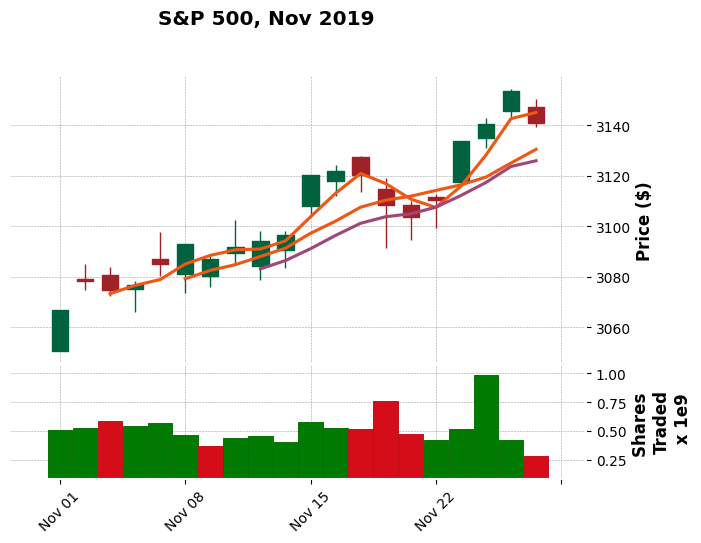

In [4]:
# Plot candlestick.
# Add volume.
# Add moving averages: 3,6,9.
mpf.plot(df, type='candle', style='charles',
            title='S&P 500, Nov 2019',
            ylabel='Price ($)',
            ylabel_lower='Shares \nTraded',
            volume=True, 
            mav=(3, 6, 9),
        )

In [5]:
import matplotlib as mpl  # 用于设置曲线参数
from cycler import cycler  # 用于定制线条颜色

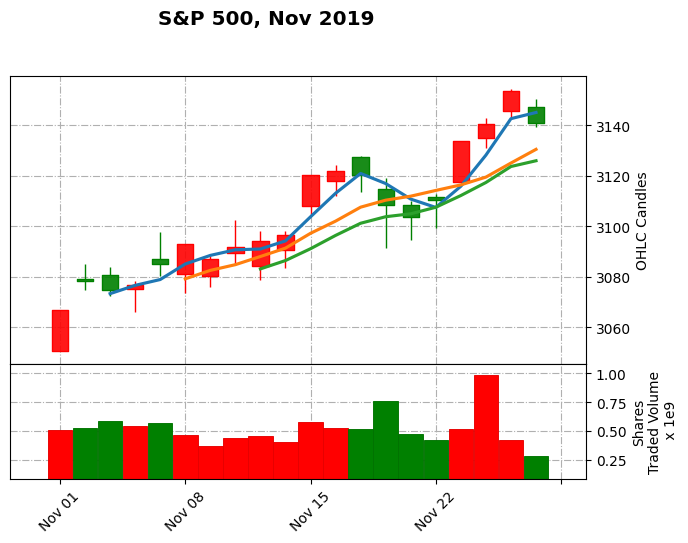

In [6]:
# 设置基本参数
# type:绘制图形的类型，有candle, renko, ohlc, line等
# 此处选择candle,即K线图
# mav(moving average):均线类型,此处设置7,30,60日线
# volume:布尔类型，设置是否显示成交量，默认False
# title:设置标题
# y_label_lower:设置成交量图一栏的标题
# figratio:设置图形纵横比
# figscale:设置图形尺寸(数值越大图像质量越高)
kwargs = dict(
    type='candle', 
    mav=(3, 6, 9), 
    volume=True, 
    title='S&P 500, Nov 2019',
    ylabel='OHLC Candles', 
    ylabel_lower='Shares\nTraded Volume', 
#     figratio=(15, 10),
#     figscale=2,
)

# 设置marketcolors
# up:设置K线线柱颜色，up意为收盘价大于等于开盘价
# down:与up相反，这样设置与国内K线颜色标准相符
# edge:K线线柱边缘颜色(i代表继承自up和down的颜色)，下同。详见官方文档)
# wick:灯芯(上下影线)颜色
# volume:成交量直方图的颜色
# inherit:是否继承，选填
mc = mpf.make_marketcolors(
    up='red', 
    down='green', 
    edge='i', 
    wick='i', 
    volume='in', 
    inherit=True)

# 设置图形风格
# gridaxis:设置网格线位置
# gridstyle:设置网格线线型
# y_on_right:设置y轴位置是否在右
s = mpf.make_mpf_style(
    gridaxis='both', 
    gridstyle='-.', 
    y_on_right=True, 
    marketcolors=mc)

# 设置均线颜色，配色表可见下图
# 建议设置较深的颜色且与红色、绿色形成对比
# 此处设置七条均线的颜色，也可应用默认设置
mpl.rcParams['axes.prop_cycle'] = cycler(
    color=['dodgerblue', 'deeppink', 
    'navy', 'teal', 'maroon', 'darkorange', 
    'indigo'])

# # 设置线宽
# mpl.rcParams['lines.linewidth'] = .5

# 图形绘制
# show_nontrading:是否显示非交易日，默认False
# savefig:导出图片，填写文件名及后缀
mpf.plot(df, 
    **kwargs, 
    style=s, 
    show_nontrading=False,
)